In [1]:
#Import Packages
import glob
import pandas as pd
import numpy as np
import os
from datetime import date
today = date.today()
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from os.path import basename
from datetime import datetime, timedelta
sns.set_context("talk")
import scipy.stats as stats
pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
pd.set_option('display.float_format', lambda x: '%.5f' % x)

today = date.today()

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
os.chdir('Datasets')

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 761F-2104

 Directory of C:\Users\Andres\Google Drive\Coursework\DataScience Nano\BlogPostProject\Analytics\Datasets

02/26/2020  08:41 PM    <DIR>          .
02/26/2020  08:41 PM    <DIR>          ..
02/26/2020  08:42 PM    <DIR>          Boston
02/26/2020  08:42 PM    <DIR>          Seattle
               0 File(s)              0 bytes
               4 Dir(s)  134,298,292,224 bytes free


# Load and Clean Seattle and Boston AirBNB Files

In [4]:
CalendarPaths = glob.glob(r"*\calendar.csv",recursive=True)
print(CalendarPaths)
ListingsPaths = glob.glob(r"*\listings.csv",recursive=True)
print(ListingsPaths)
ReviewsPaths = glob.glob(r"*\reviews.csv",recursive=True)
print(ReviewsPaths)

['Boston\\calendar.csv', 'Seattle\\calendar.csv']
['Boston\\listings.csv', 'Seattle\\listings.csv']
['Boston\\reviews.csv', 'Seattle\\reviews.csv']


## Calendar Dataset

In [5]:
CalendarDF=pd.DataFrame()
for filepath in CalendarPaths:
    tempDF = pd.read_csv(filepath)
    tempCity = basename(os.path.dirname(filepath))
    tempDF['State'] = tempCity
    tempDF.columns = tempDF.columns.str.strip().str.replace(' ', '_')
    print(tempCity)
    CalendarDF = CalendarDF.append(tempDF, ignore_index=True)
CalendarDF.head()

Boston
Seattle


,listing_id,date,available,price,State
0,12147973,2017-09-05,f,NaN,Boston
1,12147973,2017-09-04,f,NaN,Boston
2,12147973,2017-09-03,f,NaN,Boston
3,12147973,2017-09-02,f,NaN,Boston
4,12147973,2017-09-01,f,NaN,Boston


In [6]:
#Convert to pandas datetime
CalendarDF.date = pd.to_datetime(CalendarDF.date)
#Convert price to number
CalendarDF.price = CalendarDF.price.replace('[\$,]', '', regex=True).astype(float)

In [7]:
#How many availble/non-availble
CalendarDF.available.value_counts()

t    1577579
f    1124881
Name: available, dtype: int64

In [8]:
CalendarDF[CalendarDF.available == 't'].price.describe()

count   1577579.00000
mean    162.60284    
std     143.70142    
min     10.00000     
25%     79.00000     
50%     120.00000    
75%     200.00000    
max     7163.00000   
Name: price, dtype: float64

## Listing Dataset

In [9]:
ListingDF=pd.DataFrame()
for filepath in ListingsPaths:
    tempDF = pd.read_csv(filepath)
    tempCity = basename(os.path.dirname(filepath))
    tempDF['State'] = tempCity
    tempDF.columns = tempDF.columns.str.strip().str.replace(' ', '_')
    print(tempCity)
    ListingDF = ListingDF.append(tempDF, ignore_index=True)
ListingDF.sample(1)

Boston
Seattle


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,State
2936,4447430,https://www.airbnb.com/rooms/4447430,20160906204935,2016-09-07,Beautiful 3BR Townhouse w/ Garage,"Our 3 story townhouse in Savin Hill neighborhood of Dorchester is a perfect location to access the city of Boston. We live 50feet away from Savin Hill T stop and there are charming breakfast, lunch, and dinner spots nearby! Also, kid friendly! Parking is available!","All white linens, fresh towels, new soap, free coffee & tea...we strive to provide you with a hotel-level experience when you stay in our home! Stylish, simple, and clutter-free spaces. This is a cozy townhouse, with no one ""above"" or ""below"" you - it has the feel of a ""home"" with 3 levels and all the amenities! There is one available master bedroom on the top floor (KING bed), and the second bedroom is on the 1st floor (QUEEN bed) (plenty of privacy between the two rooms). We also can provide a fancy air mattress if needed which can be used in the nursery. Our space is baby/kid friendly and high chair, crib, toys etc are available for use if desired. All the baby stuff is in a third bedroom which can be made available if needed but will be put away out of sight if not.","Our 3 story townhouse in Savin Hill neighborhood of Dorchester is a perfect location to access the city of Boston. We live 50feet away from Savin Hill T stop and there are charming breakfast, lunch, and dinner spots nearby! Also, kid friendly! Parking is available! All white linens, fresh towels, new soap, free coffee & tea...we strive to provide you with a hotel-level experience when you stay in our home! Stylish, simple, and clutter-free spaces. This is a cozy townhouse, with no one ""above"" or ""below"" you - it has the feel of a ""home"" with 3 levels and all the amenities! There is one available master bedroom on the top floor (KING bed), and the second bedroom is on the 1st floor (QUEEN bed) (plenty of privacy between the two rooms). We also can provide a fancy air mattress if needed which can be used in the nursery. Our space is baby/kid friendly and high chair, crib, toys etc are available for use if desired. All the baby stuff is in a third bedroom which can be made availabl",none,"Its great! Beautiful parks within walking distance, great running routes, and awesome variety of restaurants all within 50 yards (dinner, brunch, breakfast, ice cream parlor, etc).","The Master bedroom and second bedroom are on the 3rd and 1st floor, respectively. The bathrooms are on the 2nd and 3rd floor. Just worth noting that those staying on the first floor need to walk up two flights to the 

In [10]:
ListingDF.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [11]:
ListingDF.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,7403.00000,7403.00000,7403.00000,7401.00000,7401.00000,7403.00000,7403.00000,7403.00000,7373.00000,7387.00000,7393.00000,153.00000,7403.00000,7403.00000,7403.00000,7403.00000,7403.00000,7403.00000,7403.00000,7403.00000,5943.00000,5922.00000,5932.00000,5925.00000,5934.00000,5926.00000,5926.00000,0.00000,7403.00000,6020.00000
mean,6950001.47724,20160492479532.26172,20210534.86600,32.22254,32.22254,45.06773,-97.51545,3.20019,1.24115,1.28266,1.67429,856.02614,1.55505,2.75767,14313.36944,12.84614,29.55977,48.62758,213.08915,20.68405,93.31600,9.54086,9.41723,9.72118,9.73357,9.51806,9.31978,nan,7.68607,2.02816
std,4052396.78067,400929617.50822,19623093.34622,123.58516,123.58516,2.64357,25.61320,1.89017,0.54941,0.82325,1.08136,647.18965,1.20076,13.24383,1162232.12958,12.06996,23.83940,35.01331,138.34284,36.73302,8.20745,0.82178,0.99927,0.68225,0.65659,0.77531,0.89282,nan,21.46587,1.96870
min,3335.00000,20160104002432.00000,4193.00000,0.00000,0.00000,42.23594,-122.41722,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,nan,1.00000,0.01000
25%,3864099.50000,20160104002432.00000,4343163.50000,1.00000,1.00000,42.34567,-122.33084,2.00000,1.00000,1.00000,1.00000,420.00000,1.00000,1.00000,95.50000,0.00000,1.00000,7.00000,77.00000,1.00000,91.00000,9.00000,9.00000,10.00000,10.00000,9.00000,9.00000,nan,1.00000,0.59000
50%,7035240.00000,20160104002432.00000,14486505.00000,1.00000,1.00000,47.54291,-122.27642,2.00000,1.00000,1.00000,1.00000,770.00000,1.00000,2.00000,1125.00000,10.00000,31.00000,56.00000,259.00000,7.00000,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,9.00000,nan,1.00000,1.37000
75%,9500804.00000,20160906204935.00000,30283594.00000,4.00000,4.00000,47.62446,-71.07952,4.00000,1.00000,2.00000,2.00000,1200.00000,2.00000,3.00000,1125.00000,26.00000,55.00000,84.00000,347.00000,23.00000,99.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,nan,3.00000,2.89000
max,14933461.00000,20160906204935.00000,93854106.00000,749.00000,749.00000,47.73336,-71.00010,16.00000,8.00000,7.00000,16.00000,3000.00000,15.00000,1000.00000,99999999.00000,30.00000,60.00000,90.00000,365.00000,474.00000,100.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,nan,136.00000,19.15000


## Reviews Dataset

In [12]:
ReviewDF=pd.DataFrame()
for filepath in ReviewsPaths:
    tempDF = pd.read_csv(filepath)
    tempCity = basename(os.path.dirname(filepath))
    tempDF['State'] = tempCity
    tempDF.columns = tempDF.columns.str.strip().str.replace(' ', '_')
    print(tempCity)
    ReviewDF = ReviewDF.append(tempDF, ignore_index=True)
ReviewDF.head(1)

Boston
Seattle


,listing_id,id,date,reviewer_id,reviewer_name,comments,State
0,1178162,4724140,2013-05-21,4298113,Olivier,"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)",Boston


In [13]:
ReviewDF['comments'] = ReviewDF['comments'].astype(str)

In [14]:
ReviewDF.sample(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,State
150306,3852117,48147543,2015-09-23,5324215,Lucinda,Wonderful short stay at the zen cabin! Lara and family were so accommodating about our late arrival and left lights and the heat on for us! Very cozy and comfortable for two!,Seattle
46985,3601030,19606623,2014-09-15,2938583,Nick,Shira was a wonderful host and went out of her way to help me obtain the keys to the apartment. The apartment was amazing. We especially loved the huge deck and fantastic location. Had a great trip!,Boston
135501,1472532,14217535,2014-06-15,9061317,Monica,"This apartment was a perfect place to come back to (especially after 20hrs of flying) Perfectly located and in walking distance to everything (downtown, space needle, pike market). Equipped with everything I needed. Would definitely stay here again if I came back to Seattle. The recreation room downstairs was a great way to meet other people & I had a lot of fun playing games against them.",Seattle
45729,13044229,80905219,2016-06-20,74356687,Iris,"My friend and I, were very impress when we walked in at the apartment, then there was the old couch towards the window. In the picture you can not really tell that it's a pretty old couch. I am not sure if Chris left that couch for a ""VINTAGE"" look, but it doesn't go with the rest of the Modern-man decor that he had around. Besides that couch that is old and looked dirty, the rest of the apartment was great, is modern, lot's of light that comes in, I personally love the kitchen and my friend loved the bathroom because of the two shower heads. The apartment is at a good location. It's 15 minutes away from downtown, you can get an Uber, Lyft, or Taxi for around $12-15/ride, or if you will like to experience the ""T"" (train) it was around $2.20/ride; we did both and the ""T"" was as fast as the Uber. The neighborhood seem safe, but like any city, we only took the ""T"" during the day and at night we Uber our way back. The neighborhood was nice and quite so that was a plus. Chris is a good host, he did answer our questions at a timely manner. When I was at his apartment, I felt like I was staying at a friend's house. We had a good stay, so Thank you Chris for opening your doors to our little adventure.",Boston
27802,2022303,21698822,2014-10-22,9205936,Munip,Very convenient location - walking distance to the convention centre as well as easy to access downtown Boston. The apartment is beautifully furnished with everything you might need. Quiet and safe neighbourhood.,Boston
50192,815639,20483510,2014-09-29,7173715,Cory,Located on Hull st right down the street to the popular Hanover street and the beautiful waterfront. I had a pleasant experience at the cozy North End apartment. It was great to wake up and get an espresso walk the beautiful streets of the North End. Thank you for everything Jose and Jason.,Boston
4241,4149974,89347577,2016-07-28,37890704,Adam,Place was exactly as pictures showed and super charming. The neighborhood is also great and not a place one would typically check out while being a tourist. A bunch of places all within walking distance and a quaint little pond also close. \n\nBed was super comfortable and place was exactly what someone needs while checking out a new place.,Boston
90611,7660932,44047895,2015-08-23,37003214,Tom,"This space is beautiful. Clean, comfortable, peaceful and very well taken care of. Alan is a wonderful host and will help with any questions about how to get around. Awesome stay. If I'm in Seattle again, this will be my first choice.",Seattle
66559,3602379,30442395,2015-04-22,2797490,Nathan,"Alex's place was just as described by both Alex and many reviewers - clean, spacious and recently modernized. Very short walk to the T which was only about a 20-min ride into downtown (or 5 min over to Sam Adams Brewery in the other direction). We very much enjoyed the stay and will definitely stay again the next time we return. Alex was a great host too - stopped b

# Question 1: Will using a pretrained sentiment analysis package on review comments be correlated with average listing review score left by user?
Reason for preforming this analysis is two fold, I have not had a chance to implement sentiment analysis on a dataset before and this seems like a great oppertunity. Will take a small subset of predictions and personally evaluate if sentiment analysis seems reasonable. I am aiming for a minimum viable product that is usable so will also discuss next steps to improve model at the end. Second reason is it will be interesting to see if positivity/negativity of comments correlate with overall review score. I expect it will. Will use R Score to evaluate. 

## Import and test sentiment analysis package

In [15]:
PosExample = ReviewDF.loc[0,'comments']
NegExample = ReviewDF.loc[85060,'comments']

In [16]:
# Will be using TextBlob sentiment tool. Docs found here..
#https://textblob.readthedocs.io/en/dev/index.html
from textblob import TextBlob
print (f'Positive Example: {PosExample}')
TextBlob(PosExample).sentiment

Positive Example: My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)


Sentiment(polarity=0.3880208333333333, subjectivity=0.7520833333333333)

We can see our positive example gets a polarity score of .38 (per docs: scale is from -1, 1) so overall positive score for our positive example. This is promising.

In [17]:
print (f'\nNegative Example: {NegExample}')
TextBlob(NegExample).sentiment


Negative Example: The bathroom was dirty and the pillows and sleeping bags that were provided were also dirty. Room spelled like spam and pot. 


Sentiment(polarity=-0.6, subjectivity=0.8)

We can see our negative example gets a polarity score of -.6. Seems to work based on these two example. Lets apply it to the full dataset. 

In [18]:
#Create function that I will apply to dataframe.
def Sentiment(CommentColumn):
    Senti = TextBlob(CommentColumn).sentiment
    polarity = Senti[0]
    subjectivity = Senti[1]
    return pd.Series([polarity,subjectivity])

In [19]:
#apply function
ReviewDF[['polarity','subjectivity']] = ReviewDF['comments'].apply(Sentiment)

In [20]:
ReviewDF[['comments','polarity','subjectivity']].sample(2)

,comments,polarity,subjectivity
5365,"The room was very comfortable, and Emma was very quick to respond helpfully to any questions we had!",0.53083,0.82500
65077,Tom was very welcoming and straightforward. Immediately showed me the essentials: bedroom and bath. He was available after that but allowed me my privacy for which I was grateful.,0.32500,0.35833


In [21]:
ReviewDF[['comments','polarity','subjectivity']].sort_values(by='polarity').head(5)

,comments,polarity,subjectivity
49256,"Me tocó conocer a Ricardo en persona y es muy amable y flexible. El lugar está muy bien ubicado y fácil de llegar desde el metro. Usar el baño y las áreas comunes no fue ningún problema. Sugiero cambiar la base y el colchón de la habitación 4 por uno más nuevo, cada que me movía en la noche me despertaba el ruido del mismo y se sentía que ya estaba muy usado.\nMuy recomendable!",-1.00000,1.00000
5786,Très jolie maison \nBelle chanbre très propre \nPlusieurs salle de bain très propre et récente avec serviette \nTrès bien placer à 100 mètres d'une ligne de métro \nTrès bien organisé pour les clefs \nJe suis arriver de l'aéroport à 3 h du matin à cause des retard du à la tempête aucun problème pour trouver \nC'était parfait!!! \nMerci à quinn,-1.00000,1.00000
21062,"Nous avons été surpris de découvrir qu'on partageait le logement avec d'autres invités, à moins d'avoir mal lu l'offre. Nous étions au sous-sol et une odeur de vieillissement ou d'humidité planait dans l'air. Heureusement que c'était juste pour dormir et préparer une cuisine rapide. On avait pas très bien compris si on pouvait consommer les produits sur place à part le pain et les fruits où il était mentionné ""help yourself"" jusqu'à ce qu'une hôte nous le dise. Enfin la maison est propre à l'intérieur mais le quartier est sale, l'emplacement vraiment pas pas terrible. Le transport en commun n'est pas loin, un train dessert directement vers le centre de Boston. Si vous êtes délicats c'est un logement et un emplacement à éviter En conclusion très cher pour ce que c'est comparé au 2ème logement qu'on a loué sur Boston à peu de différence prêt.\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n",-1.00000,1.00000
51235,The hallway needs to be cleaned or part of the description. It's truly disgusting.,-1.00000,1.00000
113149,"Wir hatten 3 tolle Tage in Seattle bei Dominick. Frisch gelandet nach der langen Reise aus Deutschland war das Appartment genau das richtige für uns. Mit dem Taxi kommt man für ca. 13 Dollar ab Westlake bequem vor die Haustüre. Mit einem sehr bequemen Bett, einem schönen Bad mit großer Dusche, sehr gutem Kaffee und einem liebevoll eingerichteten Zimmer in sehr hübscher Nachbarschaft ist man bestens versorgt. Wir haben es sehr genossen in Fremont zu wohnen. Es gibt genügend Restaurants und Cafes fußläufig zu erreichen. Wirklich lecker und echt nett ist es im Restaurant El Camino. Da bekommt man sogar die Biere zur Probe vorab! Auch wirklich schön ist es abends am Burke-Gilman Trail zu sitzen und den Booten zuzuschauen und der Brücke, wie sie immer wieder öffnet. Am bestem was im Supermarkt holen und einfach die Abendstimmung genießen... Obwohl wir Dominick leider knapp verpasst haben, hat uns seine Bekannte Nina sehr nett empfangen. Vielen Dank nochmal für die liebe Gastfreundschaft! Dominick hat uns im Voraus bei der Planung der Anreise bestens geholfen. Besser kann man für seine Gäste nicht da sein!",-1.00000,0.66667


In [22]:
ReviewDF[['comments','polarity','subjectivity']].sort_values(by='polarity').tail(5)

,comments,polarity,subjectivity
50408,Excellent property. Well maintained. Included all amenities listed. conveniet location.,1.00000,1.00000
30184,One of the best places I stayed at,1.00000,0.30000
50442,Beautiful home and convenient location!,1.00000,1.00000
30485,Everything was wonderful!,1.00000,1.00000
127003,Wonderful host,1.00000,1.00000


## Identify and Filter to only English Reviews 
Polarity seems to be giving me good signal but need to filter to only English dataset as TextBlob only works in english. In the future, I would look into using another algorithm that could handle multiple languages. 
Will be using the langdetect modual found here -https://pypi.org/project/langdetect/

In [23]:
from langdetect import detect

In [24]:
def detectlanguage(Comment):
    try:
        return detect(Comment)
    except:
        return "NoLang"

ReviewDF['Language'] = ReviewDF['comments'].apply(detectlanguage)

In [25]:
ReviewDF[(ReviewDF['Language']!="en")][['comments','polarity','subjectivity','Language']].sample(4)

,comments,polarity,subjectivity,Language
134,"Muy buena ubicación si se viene desde el aeropuerto, muy cerca al centro, excelente limpieza, es una experiencia de hotel.",0.00000,0.00000,es
42149,很好。离地铁站也很近。不错,0.00000,0.00000,zh-cn
59781,"非常棒的住宿体验!房间步行地铁站只要4分钟左右,十分方便,而且周围环境也十分温馨。房间很干净,有一个专门给客人用的小厨房和卫生间。小厨房里有餐具,橱柜里还有咖啡和茶!Victoria会为房客们准备浴巾毛巾拖鞋和贴心的小贴士,房主们都十分友善并且乐于助人,希望有机会还能再来。",0.00000,0.00000,zh-cn
62098,"Nicole möte upp oss i lägenheten, sent på kvällen. Lägenheten var välstädad, allting fanns tillhands.",0.00000,0.00000,sv


### Filtering Review dataset to only inlcude English reviews

In [26]:
print (ReviewDF.shape)
ReviewDF = ReviewDF[ReviewDF['Language']=='en']
print (ReviewDF.shape)

(153124, 10)
(148282, 10)


In [27]:
ReviewDF[['comments','polarity','subjectivity']].sort_values(by='polarity').head(14)

,comments,polarity,subjectivity
50368,Terrible room. It's a futon bed with no sheets.,-1.00000,1.00000
51235,The hallway needs to be cleaned or part of the description. It's truly disgusting.,-1.00000,1.00000
53543,Terrible room.\nDon't go there...,-1.00000,1.00000
23192,The location is very bad,-0.91000,0.86667
4159,Air condition and wifi were terrible also home was so dirty,-0.80000,0.90000
33814,Host's attitude is so bad.,-0.70000,0.66667
40787,"she let us use her kitchen, coffe and refrigerate, and a very ""expensive"" kitchen. collection,",-0.65000,0.91000
33873,Cold in the apartment. Noise from the street. Zero assistance.,-0.60000,1.00000
5832,The accommodation was dirty and unacceptable. The refrigerator was so smelly we could not use it. There was mildew in shower curtain.,-0.60000,0.80000
85060,The bathroom was dirty and the pillows and sleeping bags that were provided were also dirty. Room spelled like spam and pot.,-0.60000,0.80000


In [28]:
ReviewDF[['comments','polarity','subjectivity']].sort_values(by='polarity').tail(15)

,comments,polarity,subjectivity
8056,Great place to stay!,1.00000,0.75000
51644,Excellent place to stay - wonderful view. Served my needs perfectly.,1.00000,1.00000
51622,Everything was perfect!\r\n,1.00000,1.00000
84549,I'm very happy with my stay with Rosemary and Michael. The room was as described and they were gracious hosts.,1.00000,1.00000
84640,Great house! Perfect for nature-lovers,1.00000,0.87500
145416,Great place! Would stay again.,1.00000,0.75000
8022,Best place for affortable stay in Boston.,1.00000,0.30000
8016,Awesome place. Beautiful bathroom. This was the smoothest Airbnb experience I've ever had!,1.00000,1.00000
26796,Rosalia and her rabbit where the best hosts.,1.00000,0.30000
26846,Definitely a great spot!,1.00000,0.75000


Looking at this sample of the highest and lowest sentiment it's easy to see that this sentiment analysis is useful to immediately find overwhelmingly positive and negative reviews.

## Calculate average sentiment by listingID

In [29]:
PolaritybyListingDF = ReviewDF.groupby('listing_id').mean()[['polarity']].reset_index()
PolaritybyListingDF.sample(3)

,listing_id,polarity
3990,7809904,0.46450
1372,2931922,0.28639
1234,2592416,0.27210


## Merge in Review Score to Review dataset

In [30]:
print(PolaritybyListingDF.shape)
PolaritybyListingDF = PolaritybyListingDF.merge(ListingDF[['id','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']],how='left',left_on='listing_id',right_on='id')
print(PolaritybyListingDF.shape)

(6000, 2)
(6000, 10)


In [31]:
PolaritybyListingDF.sample(3)

,listing_id,polarity,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
5884,14242888,0.36547,14242888,96.00000,10.00000,10.00000,10.00000,10.00000,9.00000,10.00000
2231,4614955,0.38072,4614955,93.00000,10.00000,9.00000,10.00000,10.00000,10.00000,9.00000
1000,1867881,0.34759,1867881,90.00000,10.00000,10.00000,10.00000,10.00000,10.00000,9.00000


## Visualize Relationship between average sentiment and overall review scores and calculate pearson r

In [33]:
sns.set()

C:\Users\Andres\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


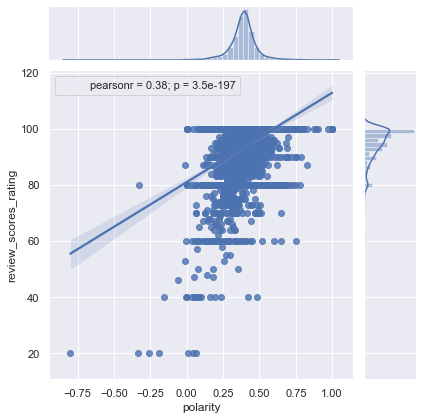

In [41]:
sns.jointplot(x="polarity", y="review_scores_rating", data=PolaritybyListingDF,kind="reg").annotate(stats.pearsonr)

### Same visual but min max Scaled

In [42]:
from sklearn import preprocessing

In [43]:
# Create x, where x the 'scores' column's values as floats
x = PolaritybyListingDF[['polarity']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
PolaritybyListingDF['polarity_norm'] = x_scaled


y = PolaritybyListingDF[['review_scores_rating']].values.astype(float)
min_max_scaler2 = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler2.fit_transform(y)
PolaritybyListingDF['review_scores_rating_norm'] = y_scaled
#df_normalized = pd.DataFrame(x_scaled)

In [44]:
PolaritybyListingDF.sample(5)

,listing_id,polarity,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,polarity_norm,review_scores_rating_norm
4304,8226982,0.42028,8226982,100.00000,10.00000,10.00000,10.00000,10.00000,9.00000,9.00000,0.67793,1.00000
357,531552,0.32070,531552,93.00000,9.00000,10.00000,8.00000,9.00000,8.00000,9.00000,0.62261,0.91250
5043,9961767,0.42385,9961767,100.00000,10.00000,10.00000,10.00000,10.00000,9.00000,10.00000,0.67992,1.00000
123,77691,0.36886,77691,88.00000,9.00000,9.00000,9.00000,9.00000,8.00000,9.00000,0.64937,0.85000
804,1450262,0.42922,1450262,99.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0.68290,0.98750


C:\Users\Andres\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


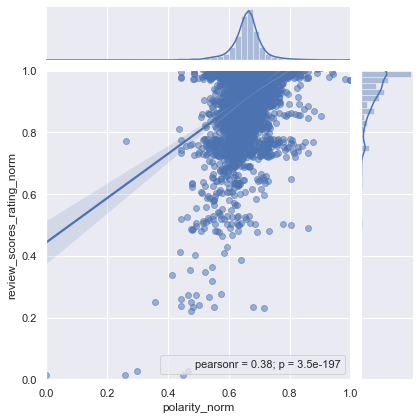

In [45]:
sns.jointplot(x="polarity_norm", y="review_scores_rating_norm", data=PolaritybyListingDF,kind="reg",ylim=(0,1),xlim=(0,1),scatter_kws={'alpha':.5},y_jitter=.03).annotate(stats.pearsonr)

In [46]:
PolaritybyListingDF.shape

(6000, 12)

While there is some vague positive correlation between the sentiment score and the overall rating of the listing, it is not very strong. Has a Pearson R score of only .37. Also important to note that the distributions are much different which is expected. Review Scores are heavily left skewed towards perfect rating while the sentiment analysis has a normal distribution. Brings up another question of, Is there a sub review metric that more closely aligns with the sentiment analysis?

## Would Standardizing Both distributions instead lead to higher correlation values?

In [47]:
PolaritybyListingDF.head()

,listing_id,polarity,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,polarity_norm,review_scores_rating_norm
0,3353,0.29267,3353,90.00000,9.00000,8.00000,9.00000,9.00000,9.00000,9.00000,0.60704,0.87500
1,4291,0.37951,4291,92.00000,10.00000,9.00000,10.00000,9.00000,9.00000,9.00000,0.65528,0.90000
2,5506,0.37442,5506,91.00000,9.00000,10.00000,10.00000,10.00000,9.00000,10.00000,0.65245,0.88750
3,5682,0.36170,5682,96.00000,10.00000,10.00000,10.00000,10.00000,9.00000,10.00000,0.64539,0.95000
4,6606,0.35810,6606,93.00000,9.00000,9.00000,10.00000,9.00000,10.00000,9.00000,0.64339,0.91250


In [48]:
def StandardizeColomn(col):
    stand = preprocessing.StandardScaler().fit_transform(col.values.astype(float))
    return stand

In [49]:
preprocessing.StandardScaler().fit_transform(PolaritybyListingDF[['polarity']].values.astype(float))

array([[-0.86773731],
       [-0.03812688],
       [-0.08675305],
       ...,
       [-3.66376407],
       [-0.91712175],
       [ 0.19834233]])

In [50]:
PolaritybyListingDF['polarity_stand'] = StandardizeColomn(PolaritybyListingDF[['polarity']])
PolaritybyListingDF['review_scores_stand'] = StandardizeColomn(PolaritybyListingDF[['review_scores_rating']])

C:\Users\Andres\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


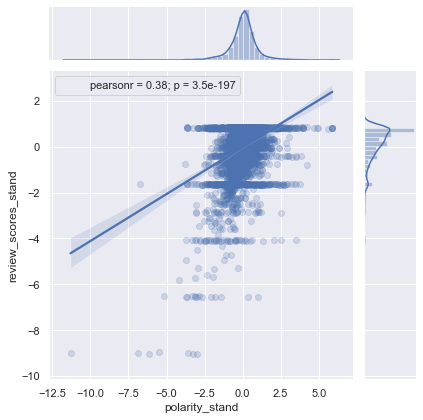

In [51]:
sns.jointplot(x="polarity_stand", y="review_scores_stand", 
              data=PolaritybyListingDF,kind="reg",scatter_kws={'alpha':0.2},y_jitter=.03).annotate(stats.pearsonr)

Standardizing still gives the same pearsonr which reflecting back on it makes sense but still glad I went ahead and checked. 

# Question 2: Which review metric most closely correlates to review sentiment. 
In the prior analysis we were only focusing on the overall listing review score but the AirBNB dataset actually has multiple different ratings that users can leave as well including listing accuracy, cleanliness, checkin experience, communication, location, and value. I'm curious to see if the written review may correlate more closely with one these other rating categories versus the overall score that a user leaves.

### prepare correlation table

In [52]:
PolaritybyListingDF.columns

Index(['listing_id', 'polarity', 'id', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'polarity_norm',
       'review_scores_rating_norm', 'polarity_stand', 'review_scores_stand'],
      dtype='object')

In [53]:
PolaritybyListingDF[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'polarity_norm']].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,polarity_norm
count,5923.00000,5902.00000,5912.00000,5905.00000,5914.00000,5906.00000,5906.00000,6000.00000
mean,93.33733,9.54270,9.41999,9.72193,9.73436,9.51846,9.32120,0.65750
std,8.14474,0.81637,0.99024,0.67843,0.65459,0.77213,0.88832,0.05816
min,20.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,0.00000
25%,91.00000,9.00000,9.00000,10.00000,10.00000,9.00000,9.00000,0.63685
50%,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,9.00000,0.66157
75%,99.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0.68294
max,100.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,1.00000


In [54]:
ReviewCorr = PolaritybyListingDF[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'polarity_norm']].corr()
ReviewCorr[['polarity_norm']].sort_values(by='polarity_norm',ascending=False)

,polarity_norm
polarity_norm,1.00000
review_scores_rating,0.37504
review_scores_accuracy,0.30267
review_scores_value,0.29144
review_scores_cleanliness,0.28516
review_scores_communication,0.26968
review_scores_checkin,0.26885
review_scores_location,0.21385


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

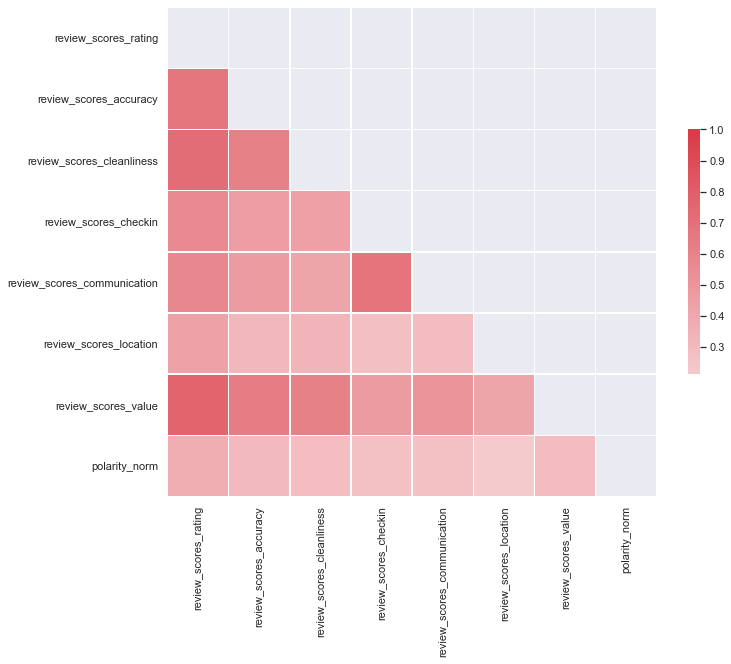

In [55]:
# Compute the correlation matrix
corr = PolaritybyListingDF[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'polarity_norm']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Using python's built in Pearson correlation table to see if any of the other review metrics that were tracked such as accuracy, cleanliness, and communication ratings better correlate to the sentiment analysis. We can see in the correlation matrix that the overall review score rating does have the highest pearson correlation which is what the expectation was. review_scores_accuracy is the next one possibly indicating that setting expectations with the customer is one of the most important aspects of the overall AirBNB experience. May be worthwhile to investigate further.

# Question 3: Can we identify any common characteristics of listings with high sentiment ratings?  

In [57]:
DescriptiveCols = ['host_since','host_response_time','host_response_rate','host_acceptance_rate',
                  'host_is_superhost','host_verifications','host_has_profile_pic','host_identity_verified',
                   'property_type','room_type','bathrooms', 'bedrooms', 'beds', 'bed_type',
                  'square_feet','price','weekly_price','monthly_price','guests_included','minimum_nights',
                  'instant_bookable','cancellation_policy']

## Clean up the columns of interest

In [58]:
#Change percentages to numeric
ListingDF['host_response_rate'] = pd.to_numeric(ListingDF['host_response_rate'].str.replace("%",""))
ListingDF['host_acceptance_rate'] = pd.to_numeric(ListingDF['host_acceptance_rate'].str.replace("%",""))
ListingDF['price'] = pd.to_numeric(ListingDF['price'].str.replace("$","").str.replace(",",""))
ListingDF['weekly_price'] = pd.to_numeric(ListingDF['weekly_price'].str.replace("$","").str.replace(",",""))
ListingDF['monthly_price'] = pd.to_numeric(ListingDF['monthly_price'].str.replace("$","").str.replace(",",""))
#Change make boolean values instead of string
ListingDF['host_is_superhost'] = ListingDF['host_is_superhost']=="t"
ListingDF['host_has_profile_pic'] = ListingDF['host_has_profile_pic']=="t"
ListingDF['host_identity_verified'] = ListingDF['host_identity_verified']=="t"
ListingDF['instant_bookable'] = ListingDF['instant_bookable']=="t"

In [59]:
#Feature engineer new columns, I ended up not using this because SQ Feet is mostly blank as shown below
ListingDF['PricePerSQFT'] = ListingDF['price']/ListingDF['square_feet']

In [60]:
# percentage of blank SQFT
ListingDF['square_feet'].isna().sum()/len(ListingDF['square_feet'])

0.9793327029582601

In [61]:
ListingDF.dropna(how='all',axis=1,inplace=True)

I'm going to quickly compare the descriptive statistics for numerical datapoints such as number of beds and monthly price of rental units with high sentiment ratings vs.those without a high sentiment rating. I'm interested to see if we find any obvious differences.  

In [62]:
print(ListingDF.shape)
ListingDF = ListingDF.merge(PolaritybyListingDF,how='left',on = 'id')
print(ListingDF.shape)

(7403, 96)
(7403, 109)


I experimented with different cutoff points and found that below .2 sentiment (polarity below) you could typically call negative while those above .2 you would typically see as positive. I'll use this as my cuttoff point for this analysis. 

In [63]:
#Great Reviews
ReviewDF[['comments','polarity','subjectivity']][ReviewDF['polarity']>.9][ReviewDF['polarity']<1].sample(5)

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,comments,polarity,subjectivity
17158,Paolo and his team are awesome to work with. Studio is in great shape with wonderful views and a perfect location.... Thank you Paolo!,0.95000,0.93750
90524,"Loved staying in Jennifer's home! Te room was perfect...def equipped w the necessities.\nCoffee, coffee maker, fridge and microwave. Amazing shower! This after 3 days camping was a must. \n\nJennifer her son Jackson and Shawn were all so welcoming friendly..I would def recommend this place!",0.90625,0.85000
122064,Place was great!!! Awesome views and great host. Literally a two minute walk to the lake. Perfect location for a Seattle retreat.,0.95000,0.87500
77826,Great place! Loved being there!,0.93750,0.77500
8816,"Could not have asked for a better experience than what we had with Faye and Matt! Best location, best space and best hosts!",0.90625,0.35000


In [64]:
#Negative Reviews
ReviewDF[['comments','polarity','subjectivity']][ReviewDF['polarity']>-1][ReviewDF['polarity']<-.5].sample(5)

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,comments,polarity,subjectivity
24,We didn´t meet Izzy at all!!!! After we arrived nobody was there except some spanish speaking people.\r\nOur room was disgusting!!! It smelted like mold and was very dirty!!!!\r\nThe Bathroom wasn´t cleaned either and my friend and i wanted to leave right after we came…\r\nThe Dryer or washer was not usable because the assistant from Izzy washed all the time.\r\nThe Neighborhood is not safe at all and every other morning u could hear people fight.\r\nDon´t stay there!!!!!! It´s nothing like u would expect it! \r\nAnd it´s defenetly to expensive for this nasty place!!!!,-0.50754,0.63884
36022,"I was very disappointed with the presentation of the place when we arrived despite arriving after our check in time of 2pm. The place was cleaned within a few hours, however.",-0.58750,0.53750
85060,The bathroom was dirty and the pillows and sleeping bags that were provided were also dirty. Room spelled like spam and pot.,-0.60000,0.80000
33814,Host's attitude is so bad.,-0.70000,0.66667
40787,"she let us use her kitchen, coffe and refrigerate, and a very ""expensive"" kitchen. collection,",-0.65000,0.91000


In [65]:

ReviewDF[['comments','polarity','subjectivity']][ReviewDF['polarity']>-.1][ReviewDF['polarity']<0].sample(5)

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,comments,polarity,subjectivity
31263,"Balint's place is clean, furnished with newer furniture, and quite ( there is an upstairs neighbor). His description is accurate. Our experience was that the dryer was difficult to operate due to the broken switch ( but he had a set of tools that made it possible) and turning the hot water valve under the kitchen was inconvenient. There was no direct contact with him as everything is through notes and lock boxes. Recommended!",-0.07454,0.70648
55249,"The host did not welcome us, no one was there to greet us in person and make us feel at home. This place is essentially a renting company who rents out rooms for people. C1 and C2 are located in the attic, basically. Only way you can stand up is in the middle, and that is if you're under 5'10"". This is far from being paradise.\r\n\r\nThe neighbourhood is located on the cusp of the ghetto. I was genuinely surprised no one broke into my car, which was by the way parked on the street. I had to move my car during my stay since it was on the side where the sweeping was done on the 1st and 3rd of every Wednesday.\r\n\r\nNot impressed at all.",-0.08750,0.63750
117295,"This booking was refunded, less fees. Had arranged to leave door unlocked because our train would get in 4 hours late than anticipated. We arrived to find the door locked and no one was available to answer messages due to it being 1 hour later than he restaurant closed, so I had to find a hotel downtown instead. Please note I that airbnb requires feedback for all items, even though some do not apply as I did not stay; average ratings have been selected in these cases.",-0.06310,0.27738
135964,"the place is very cute, well located and nicely decorated. However, there were some serious shortcomings. First, there was only one roll of toilet paper, no paper towels, no dish sponge and very little shampoo. Since we were staying for a week we had to purchase these items ourselves. Second, the fireplace did not work and made the apartment stink of smoke. When we pointed this out to the landlord her response was that the prior occupants had no problem with the fireplace, implying we were at fault. We had to buy candles to mask the smell. Third, despite being told that Verizon users had good service in the apartment we could never make our phones work and had to stand outside in the wet and cold to make phone calls. Fourth, we were told that she had a netflix and hulu accounts but every time we tried to use them we were asked for a password and of course we were not provided a password. Finally, the kitchen was lacking basic goods such as salt and pepper. Overall, we were very disappointed with our stay.",-0.00427,0.46500
152621,"Following the last review, however, there are things that I would give people a heads-up about:\r\nCheck-in is NOT flexible and we weren't able to check in until after 7 pm at a rainy night, although there is still controversy over who is to blame for messages not getting through;\r\nThe house is NOT soundproof at all and people from lower floor could hear those from upper floor do everything, so if you at least want to talk even at a low voice, it would be rendered impossible because it would disturb others;\r\nAsk the host about facilities and house rules (like keeping voice low at what time period or what service is covered and what instructions are to be followed) upon arrival, because we weren't shown rooms other than bedrooms until the day of departure, including laundry room and yoga room (never shown).\r\nSo even if Kazami is highly recommended as person, you should think twice about taking him as host.",-0.04317,0.37067


In [66]:
ListingDF['Highsentiment'] = ReviewDF['polarity']>.2
ListingDF['Highsentiment'].fillna(False,inplace = True)

In [67]:
ListingDF['Highsentiment']

0       True
1       True
2       True
3       True
4       True
        ... 
7398    True
7399    True
7400    True
7401    True
7402    True
Name: Highsentiment, Length: 7403, dtype: bool

In [68]:
#Descriptive statistics for listings with high sentiment
HighSentimentStats = ListingDF[DescriptiveCols][ListingDF['Highsentiment']].describe()
HighSentimentStats

,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights
count,5233.00000,5027.00000,6025.00000,6038.00000,6042.00000,124.00000,6052.00000,2358.00000,1930.00000,6052.00000,6052.00000
mean,94.76763,92.15616,1.24257,1.27824,1.67114,876.45968,149.71183,829.55216,2960.54611,1.54627,2.78767
std,12.46525,17.28597,0.55630,0.82315,1.09320,673.17171,122.46810,590.35085,2291.66287,1.19646,14.06871
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,80.00000,500.00000,0.00000,1.00000
25%,97.00000,95.00000,1.00000,1.00000,1.00000,431.25000,79.00000,450.00000,1534.75000,1.00000,1.00000
50%,100.00000,100.00000,1.00000,1.00000,1.00000,750.00000,119.00000,650.00000,2352.00000,1.00000,2.00000
75%,100.00000,100.00000,1.00000,2.00000,2.00000,1200.00000,189.00000,1000.00000,3500.00000,2.00000,3.00000
max,100.00000,100.00000,8.00000,7.00000,16.00000,3000.00000,4000.00000,6300.00000,40000.00000,15.00000,1000.00000


In [69]:
#Descriptive statistics for listings with low sentiment
LowSentimentStats = ListingDF[DescriptiveCols][~ListingDF['Highsentiment']].describe()
LowSentimentStats

,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights
count,1176.00000,1132.00000,1348.00000,1349.00000,1351.00000,29.00000,1351.00000,543.00000,475.00000,1351.00000,1351.00000
mean,95.68793,91.20671,1.23479,1.30245,1.68838,768.65517,152.53960,830.11050,3219.28421,1.59437,2.62324
std,10.83267,18.03880,0.51765,0.82370,1.02697,522.83658,130.76671,515.90259,2274.42190,1.21951,8.63272
min,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,20.00000,100.00000,600.00000,0.00000,1.00000
25%,98.00000,93.00000,1.00000,1.00000,1.00000,340.00000,80.00000,500.00000,1692.50000,1.00000,1.00000
50%,100.00000,100.00000,1.00000,1.00000,1.00000,800.00000,120.00000,700.00000,2500.00000,1.00000,2.00000
75%,100.00000,100.00000,1.00000,2.00000,2.00000,1200.00000,195.00000,1000.00000,3997.50000,2.00000,3.00000
max,100.00000,100.00000,4.00000,5.00000,7.00000,1850.00000,3000.00000,4000.00000,13920.00000,8.00000,300.00000


In [80]:
#Absolute percent change in mean between high and low sentiment
PercentChangeMean = 1 - (HighSentimentStats/LowSentimentStats)
PercentChangeMean.loc['mean'].abs().sort_values(ascending=False)

square_feet            0.14025
monthly_price          0.08037
minimum_nights         0.06268
guests_included        0.03017
bedrooms               0.01859
price                  0.01854
host_acceptance_rate   0.01041
beds                   0.01021
host_response_rate     0.00962
bathrooms              0.00630
weekly_price           0.00067
Name: mean, dtype: float64

In [72]:
HighSentimentStats-LowSentimentStats

,host_response_rate,host_acceptance_rate,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights
count,4057.00000,3895.00000,4677.00000,4689.00000,4691.00000,95.00000,4701.00000,1815.00000,1455.00000,4701.00000,4701.00000
mean,-0.92030,0.94944,0.00778,-0.02421,-0.01724,107.80451,-2.82777,-0.55833,-258.73810,-0.04811,0.16443
std,1.63258,-0.75284,0.03865,-0.00055,0.06623,150.33513,-8.29861,74.44826,17.24097,-0.02305,5.43599
min,0.00000,0.00000,0.00000,0.00000,-1.00000,0.00000,-10.00000,-20.00000,-100.00000,0.00000,0.00000
25%,-1.00000,2.00000,0.00000,0.00000,0.00000,91.25000,-1.00000,-50.00000,-157.75000,0.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000,0.00000,-50.00000,-1.00000,-50.00000,-148.00000,0.00000,0.00000
75%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-6.00000,0.00000,-497.50000,0.00000,0.00000
max,0.00000,0.00000,4.00000,2.00000,9.00000,1150.00000,1000.00000,2300.00000,26080.00000,7.00000,700.00000


To further enhance this analysis we could look at the categorical categories and use one hot enconding as well or even run a classification machine learning model on the dataset to see which columns it gives the highest weighting.  